# Hough Transform

This notebook implements the classical Hough transform for detecting lines in an image. We later modify it to detect a set of lines in an image that most likely compose the borders of a Sudoku puzzle

In [1]:
import cv2
import numpy as np
from numpy import ndarray
from matplotlib import pyplot as plt
from python_helper_functions import CannyEdgeDetector
from typing import *

print(f"OpenCV2 version: {cv2.__version__}")

OpenCV2 version: 4.11.0


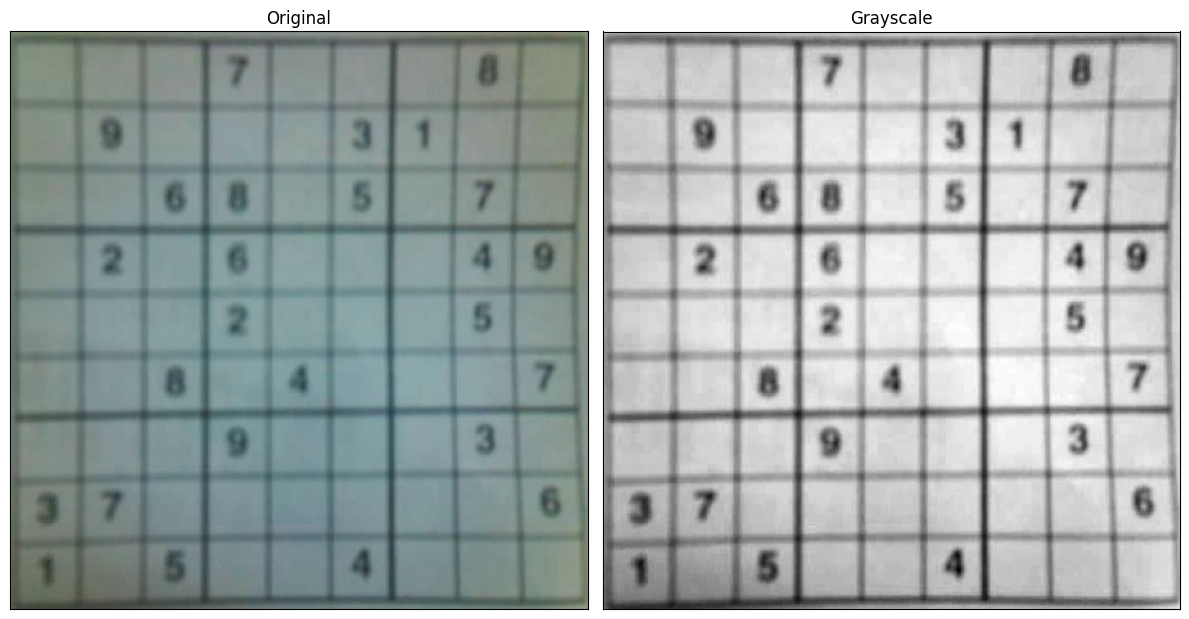

In [2]:
image_path = './warped_dataset/image1.jpg'

# Load and convert BGR → RGB
img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
# Load grayscale
bw = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

fig = plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(bw, cmap='gray')  # invert grayscale
plt.title("Grayscale")
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

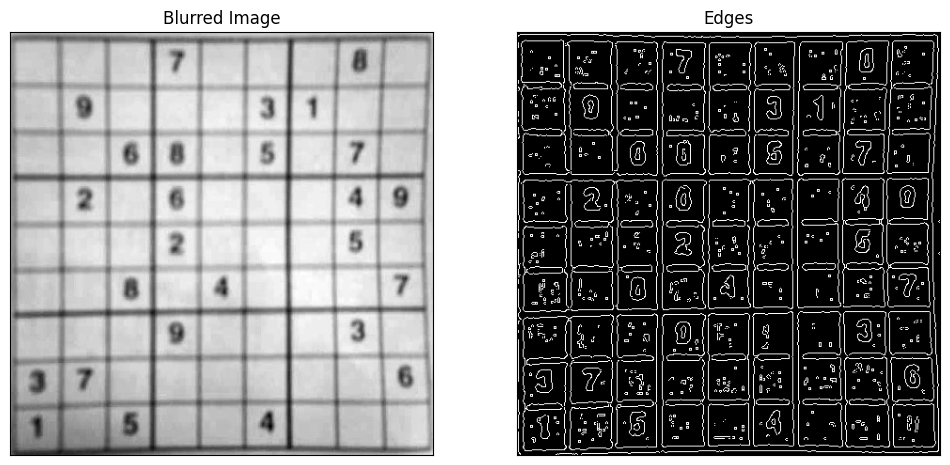

canny_out shape: (450, 450)


In [3]:
gray = cv2.adaptiveThreshold(bw,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
canny_out = cv2.Canny(gray, 200, 250)

fig = plt.figure(figsize=(12,8))
plt.subplot(1,2,1),plt.imshow(bw,'gray')
plt.title('Blurred Image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(canny_out,'gray')
plt.title('Edges')
plt.xticks([]),plt.yticks([])
plt.show()
print(f"canny_out shape: {canny_out.shape}")

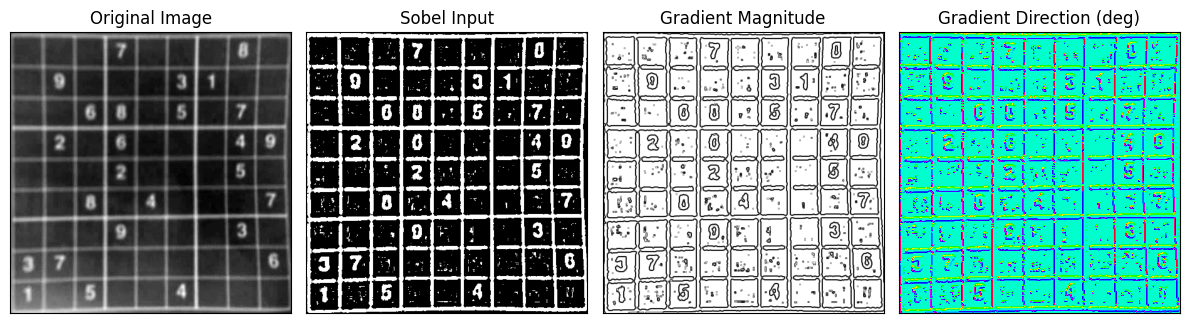

Number close: 156571 / 202500


In [4]:
# apply adaptive threshold
gray = cv2.adaptiveThreshold(bw, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                             cv2.THRESH_BINARY, 11, 2)

# Compute gradients using Sobel (same as Canny does internally)
grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude and direction
magnitude = np.sqrt(grad_x**2 + grad_y**2)
direction = np.arctan2(grad_y, grad_x)  # radians

# Optional: normalize for visualization
magnitude_norm = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
direction_deg = np.degrees(direction)

# Show results
fig = plt.figure(figsize=(12, 8))

plt.subplot(1, 4, 1),plt.imshow(bw,'gray_r')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])

plt.subplot(1, 4, 2),plt.imshow(gray,'gray_r')
plt.title('Sobel Input')
plt.xticks([]),plt.yticks([])

plt.subplot(1, 4, 3),plt.imshow(magnitude_norm,'gray_r')
plt.title('Gradient Magnitude')
plt.xticks([]),plt.yticks([])

plt.subplot(1, 4, 4),plt.imshow(direction_deg,'hsv')
plt.title('Gradient Direction (deg)')
plt.xticks([]),plt.yticks([])

plt.tight_layout()
plt.show()

print(f"Number close: {np.isclose(magnitude_norm, canny_out).sum()} / {canny_out.shape[0] * canny_out.shape[1]}")

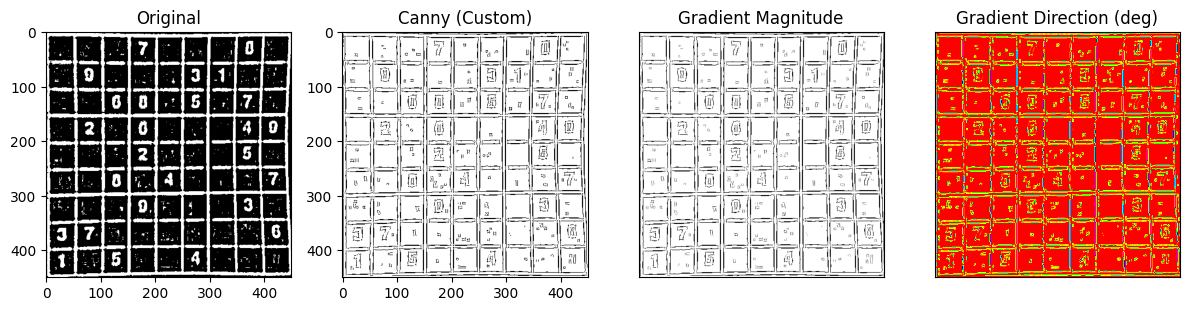

Number close: 182417 / 202500


In [7]:
# Load and preprocess image
gray = cv2.adaptiveThreshold(bw, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                             cv2.THRESH_BINARY, 11, 2)
ced = CannyEdgeDetector()
edges, mag, ang = ced(gray, 200, 250)

mag = np.where(edges > 0, mag, 0)
ang = np.where(edges > 0, ang, 0)

fig = plt.figure(figsize=(12, 8))
plt.subplot(1,4,1); plt.imshow(gray, cmap='gray_r'); plt.title("Original")
plt.subplot(1,4,2); plt.imshow(edges, cmap='gray_r'); plt.title("Canny (Custom)")
plt.subplot(1, 4, 3),plt.imshow(mag,'gray_r')
plt.title('Gradient Magnitude')
plt.xticks([]),plt.yticks([])

plt.subplot(1, 4, 4),plt.imshow(ang,'hsv')
plt.title('Gradient Direction (deg)')
plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()
print(f"Number close: {np.isclose(edges, canny_out).sum()} / {canny_out.shape[0] * canny_out.shape[1]}")

In [ ]:
def hough_transform(img: cv2.Mat, n: int, m: int, verbose: bool = False):

    accumulator = np.zeros((n, m), dtype=np.int32)
    gray = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                             cv2.THRESH_BINARY, 11, 2)
    ced = CannyEdgeDetector()
    edges, mag, ang = ced(gray, 200, 250)
    mag = np.where(edges > 0, mag, 0)
    ang = np.where(edges > 0, ang, 0)
    r_max = np.linalg.norm(np.array(img.shape))

    if verbose:
        print(f"Gradient magnitude min/max: {np.amin(mag)}/{np.amax(mag)}")
        print(f"Gradient angle min/max: {np.amin(ang)}/{np.amax(ang)}")

    for i in range(gray.shape[0]):
        for j in range(gray.shape[1]):
            g = gray[i, j]
            if g == 0:
                continue

            r_hat = np.linalg.norm(np.array([i, j]))
            ang_hat =



    pass